<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/notes/2ndWeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lezione 4
Regole per la riproducibilita: 
- I dati devono essere accessibili a tutti, vanno shareati per es su github
- Setto sempre il seed a un qualche numero, così se lo faccio girare di nuovo ottengo la stessa cosa
- Prima di consegnare fare un restart and run all, così mi assicuro che funzioni con la sequenza di celle corretta 

Regole di igiene del codice: 
- Axis labels
- Caption: spiega tutto quello che c'è nel plot (tipo legenda) dice cosa c'è di interessante nel plot
- Evitare i numeri "volanti", se stampo un numero stampo anche che cosa è e cosa significa

- Importare sempre tutto quello che serve all'inizio del codice

##Primo argomento Probabilità e statistica

onlinestatbook.com

### Probabilità
 Due interpretazioni: di solito concetto frequentista, ma in molti dei modelli e dei pacchetti che useremo aderiscono all'interpretazione Bayesiana

 - Frequentista: probabilità = frequenza (soggetto a deviazioni)(non prendo il limite?) 
 - Bayesiana: introduco un prior (conoscenza a priori) che arricchisce la mia interpretazione della frequenza (se io sono a casa e ho uan moenta e voglio predire la probabilità di testa o croce già parto pensando che sarà il 50% se è uno per strada penso che la moneta possa essere truccata).

 Dal punto di vista frequentista penso che ripetendo un esperimento più volte avrò una corrispondenza più accurata tra frequenza e probabilità ( legge dei grandi numeri) 


Vedi slide con gli operatori e l'aritmetica: 
https://slides.com/federicabianco/mlpns23_2


 ### Statistica

 la statistica si basa sulla teoria della probabilità ed è alla base dell'analisi.
 Ci porta dall'osservazione di un sample a fare inferenze su tutta la popolazione 

 #### Distribuzione:
 formula, modello 
 #### Popolazione: 
 tutti gli elementi 
 #### Sample:
  subset limitato della popolazione, quello su cui di solito osservo


### Momenti della distribuzione

Primo momento: media (aritmetica)
non è la moda (picco)
non è la mediana (mezza distribuzione a destra e mezza a sinistra)

Nel codice: 
np.mean(array) come funzione, oppure 
.mean()
.mean(axis=1) specifico l'asse rispetto al quale faccio la media 

np.median(array) funzione, non faccio array.median()


Secondo momento: varianza

Nel codice stessa cosa 
.std()
.std(axis=1)

Numeri da ricordare: distribuzione Gaussiana 68%, 95%, 99.7%
Li usiamo come threshold per dire se rigetto oppure no la mia teoria
La scelta su quanti sigma scelgo dipende dal campo di ricerca, in fisica di solito 3 e in particle physics spesso 5

Nelle scenze sociali spesso si tiene anche il 2 sigma, perchè i comportamenti umani sono stocastici

Interquantile range: guarda alla percentuale di valori all'interno di una certa area (solo le la distr è gaussiana o simmetrica ha una relazione stretta con la sigma )

### Distribuzione binomiale 
 Distribuzione che descrive il risutlato per una collezione di esperimenti, ciascuno con gli stessi outcome con probabilità di ciascun outcome costante (coin toss, truccata oppure no)
 
- Supporto positivo
- PMS è la distribuzione, densità di probabilità 
- Skewness momento terzo, se è simmetrica oppure no 
- Kurtosi quanto sono pesanti le code

### Distr. Poisson 
Descrive la varianza su un natural statistic process: es. flusso di una stella per una quantità di tempo limitata (numero di fotoni) 
Per stocasticità della natura se è un evento steady in realtà ha una varianza e segue una distr poisson 

Es se misuro 100 fotoni mi aspetto che il valore vero stia in $100\pm \sqrt{100}$

Un solo parametro: $\lambda$

### Gaussiana 
- Supporto infinito 
- Simmetrica 
- "Continua"

Motivo per cui è simmetrica: la PDF è pari rispetto alla media 

Anche se quasi niente in natura è gaussiano quasi tutte le analisi statistiche assumono distr Gaussiane (limite centrale?)
Spesso i risultati della ricerca sono corretti solo sotto l'assunzione di Gaussianità, si spera che l'approsismazione sia abbastanza buona 


 




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://bit.ly/videosfile"

In [ ]:
videos = pd.read_csv(url)

In [ ]:
videos.describe() #per le colonne numeriche fa una prima analisi delle proprietà statistiche, è comunque un dataframe, posso usarlo come metodo veloce per estrarre le colonne numeriche

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [ ]:
ncols=(videos.describe()).columns

In [ ]:
print(videos["views"].mean())
print(videos["views"].std())

2360784.6382573447
7394113.75970394


In [ ]:
videos[ncols].std()

category_id      7.568327e+00
views            7.394114e+06
likes            2.288853e+05
dislikes         2.902971e+04
comment_count    3.743049e+04
dtype: float64

In [ ]:
videos_array = videos[ncols].values #lo rendo un array, non più un dataframe 

In [ ]:
videos_array.mean(axis=1)

array([ 164968.6,  506968.2,  670202. , ...,  223913.4, 1173941. ,
       2204197.8])

In [ ]:
videos.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307
views,-0.168231,1.000000,0.849177,0.472213,0.617621
likes,-0.173921,0.849177,1.000000,0.447186,0.803057
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000


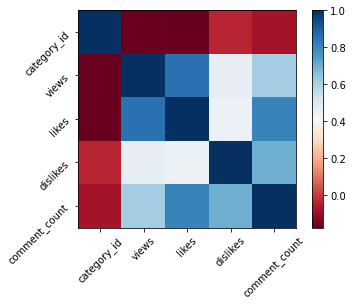

In [ ]:
plt.imshow(videos[ncols].corr(), clim=(-1,1));   #specifico il range di colori
plt.imshow(videos[ncols].corr(), cmap="RdBu");

plt.colorbar();
plt.xticks([0,1,2,3,4], videos[ncols].columns,rotation = 45);
plt.yticks([0,1,2,3,4], videos[ncols].columns,rotation = 45);


#Volendo sistemare per eliminare la colonna dell category ID tanto non serve a nulla




#Lezione 5 (era esercitazione)



#Lezione 6

Riparto dal Null hipothesis rejection testing (framework)
e dal principio di falsificabilità

non raccolgo dati per confermare il modello ma per cercare di falsificarlo, se non vedo il fenomeno predetto allora la mia teoria è falsificata 

Meglio specificare all'inizio della collezione dei dati o dell'analisi a quanti sigma settiamo il threshold, se no potremmo essere tentati di settarlo in modo tale da farci fasificare la teoria

Se capita nell'esame un null hipothesis rejection testing (per esempio per verificare se i dati sono gaussiani) è importante specificare all'inizio il threshold

Nel nostro caso la null hipothesis non è la teoria nuova ma quella che sostengo sia sorpassata, in pratica se voglio settare la mia analisi in questo framework: 
- creo la mia preidizione (nessun data analysis ma soltanto teoria), sto facendo la mia ipotesi (null hipothesis = teoria che assumo sia vera)
- definisco qual è la alternative hipotesis, cioè quello che rimane se la mia teoria viene rigettata, è importante che siano le uniche due possibilità, altrimenti il solo risultato è quello di rigettare lo status quo, non di creare un nuovo modello. ovvero la alternative hypothesis deve essere il complemento della null hypothesis

  Esempio: terra piatta è la mia null hipothesis, la mia alternative non può essere che è rotonda, ma che è non-piatta

- Setto la confidenza (threshold) tipicamente in termini di sigma 

- Cerco la quantità misutrabile che una volta misurata mi permette di confermare o rigettare la null hipothesis. 
Cosa prendo? *Pivotal_quantities*, cioè quantità che secondo la null hipothesis seguono una distribuzione conosciuta

  Esempio test del chi quadro: 
  ....

##Critiche al modello 

critica alla scelta del threshold, che è arbitraria, non ho motivi per dire che 5 percento sia alta o bassa

In più complica il "metaanalysis", cioè stessi dati ma conclusioni differenti perchè il threshold è stato scelto diverso 



##Z-test
valuto se la media di un sample con varianza nota è la stessa di tutta la popolazione

Pivotal quantity: $Z=(\bar{X}-\mu0)/s$

$\bar{X}$ è la media del sample
$\mu0$ è la media della popolazione
s è la varianza del sample: standar deviation del modello diviso la radice del numero di elementi nel sample

Mi aspetto che la Z sia distribuita come una gaussiana standard, cioè media nulla e sigma=1

Rigetto il modello se la z che ho "estratto" da questa distribuzione calcolandola è più lontana di threshold-sigma allora rigetto

Visto che mi aspetto una normale con sigma=1 la z che ottengo rappresenta già il numero di deviazioni di distanza dalla media 

##T-test
Sono le medie di due sample diversi significativamente differenti?

La distribuzione che mi aspetto non è gaussiana ma student's t distribution
ha come parametro i gradi di libertà 

Molto spesso posso definire dei valori specifici sulla base del parametro, cioè il valore che misuto a una certa threshold, faccio la tabella e non devo preoccuparmi di fare altri conti


#K-S test
kolmogorov-smirnoff

due sample vengono dalla stessa distribuzione(che non mi interessa!)
non è parametrico!
ho due distribuzioni che non sono gaussiane ma voglio vedere se sono la stessa distribuzione(nel limite dei dati) 
posso usare il KS test

misura, nello spazio delle distribuzioni cumulative, qual è la massima distanza parallela all'asse y, quindi molto ez

distribuita come una chi sqare dist

Relaziono questa distanza a una quantità che ha una specifica distribuzione che è complicata ma non mi interessa

la funzione ritorna la statistica(distanza massiama) e il pvalue, il punto sul quale il mio test ricade nella distribuzione attesa 






###Approccio bayesiano

Parleremo di prior, che deve essere copletamente scollegato dall'evidenza che sto analizzando: deve venire da dati copletamente differenti o esperienze che mi portano a credere qualcosa ma che non hanno niente a che vedere con i dati in questione
Probabilità del modello dati i dati = probabilità del modello (prior) * probabilità dei dati dato il modello (concetto simile al chi square test) / probabilità dei dati regardless of the model (evidence: non ha senso, non ci sono esempi in cui con buona confidenza si può sapere la probabilità intrinseca dei dati, motivo per cui l'approccio bayesiano non ha avuto molta fama in passato) 

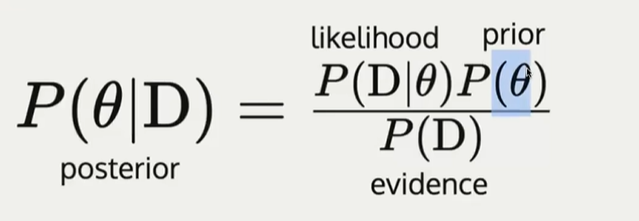


per noi l'evidence non sarà un problema
quello che misuro è il posterior

Posso fare un analisi per vedere se un certo set di parametri ha una probabilità maggiore di un altro set, è per questo che non mi interessa l'evidenza, confronto due posterior costruiti sugli stessi dati, in cui però cambio il set di parametri, in questo modo l'evidence, che compare al denominatore, è la stessa e la butto via!

Non posso usare il teorema per fare comparazione di modelli differenti se non si prestano agli stessi dati, cioè se ho un dataset e quindi una evidence differente.

Il modo in cui utilizzeremo il teorema di bayes è per model comaprison e anche per ottimizzazione, per es MCMC procede in questo modo, calcolando la posterior per i vari set di parametri. 

Posso pensare al prior come un contstrain al modello, per es se so che i parametri non possono essere negativi posso settare un prior che esclude la regione proibita, comunemente lo uso per restringere la dimensione dello spazio dei parametri, se ho un intuizione per dove possa essere la soluzione potrei mettere un prior che è una gaussiana, non è strettamente corretto ma se scelgo un prior a supporto illimitato il modello può sempre arrivare a qualucnque posterior se lo lascio abbastanza tempo, ma è dannoso se ho poche risorse computazionali e non posso lasciare andare l'analisi troppo a lungo.


"uninformative prior": probabilità uniforme per tutti i valori, ma attenzione che se faccio delle trasformazioni potrei cambiarne la forma!

Likelihood è il modello

 

##Scaling laws

Quantità che dipendono dalla stessa grandezza ma a potenze diverse, per esempio area e volume di un vubo dipendono sempre dalla lunghezza del lato ma a potenze differenti, stesssa cosa anche per cerchio e sfera, mi interessa solo la potenza del parametro del modello

interessanti perchè se vedo una relazione di tipo scaling posso relazionarla a un modello che la prevedeva.

###Terremoti
Esistenza di una scling law nell'intervallo tra terremoti sulla base della magnitudo

L'idea è di usare il KS test separando il sample totale il sottosamples che sono identificati da magnitudini specifiche.
Si può verificare che se esiste una scaling law, allora la distribuzione della probabilità di avere un terremoto in funzione ...

Insomma faccio un KS test e se non posso rigettare l'ipotesi allora vuol dire che non posso dire che non esiste una scaling law per i terremoti.




